## Data Mining and Machine Learning
## Edgar Acuna
### Scatterplot matrix  y Heatmaps en Python usando tres librerias: matplotlib, plotly, seaborn 
#### October 2021

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import bokeh
import plotnine
from sklearn.preprocessing import StandardScaler

In [2]:
# Otra forma de llamar a plotnine
from plotnine import *

In [3]:
#Funcion magica para que la grafica de matplotlib salga en la pantalla
%matplotlib inline

### Scatterplot Matrix

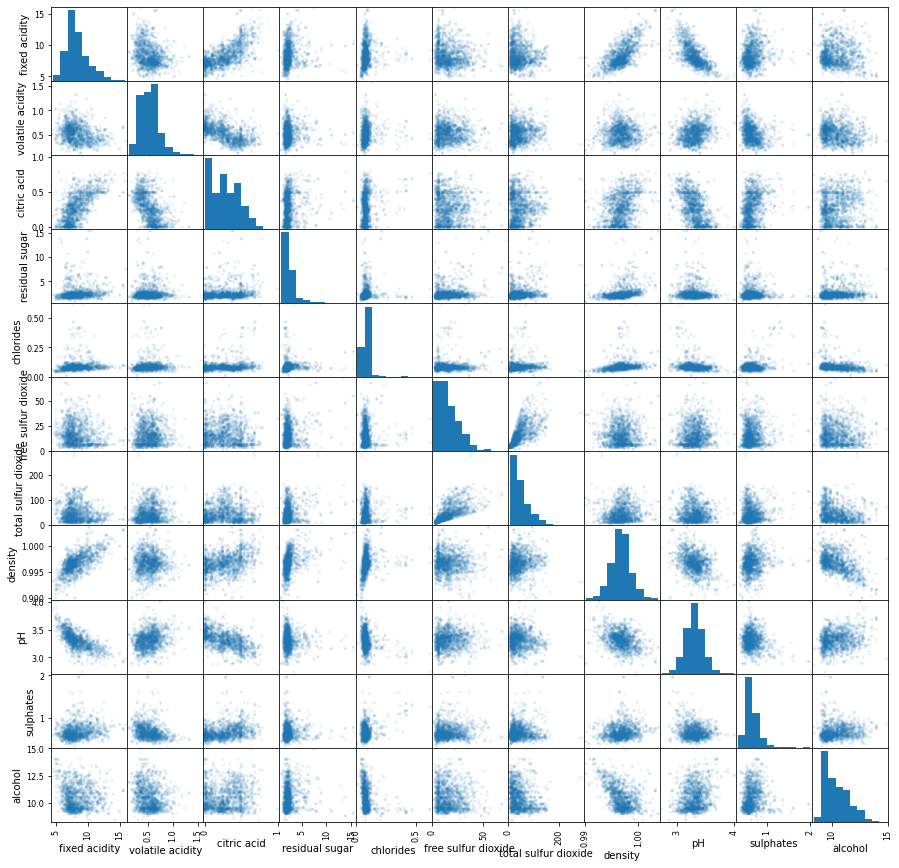

In [4]:
#Leyendo el dataset winde de la UCI
wine_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
df=wine_data.drop('quality',axis=1)
axes = pd.plotting.scatter_matrix(df, alpha=0.1,figsize=(15,15))
plt.show()

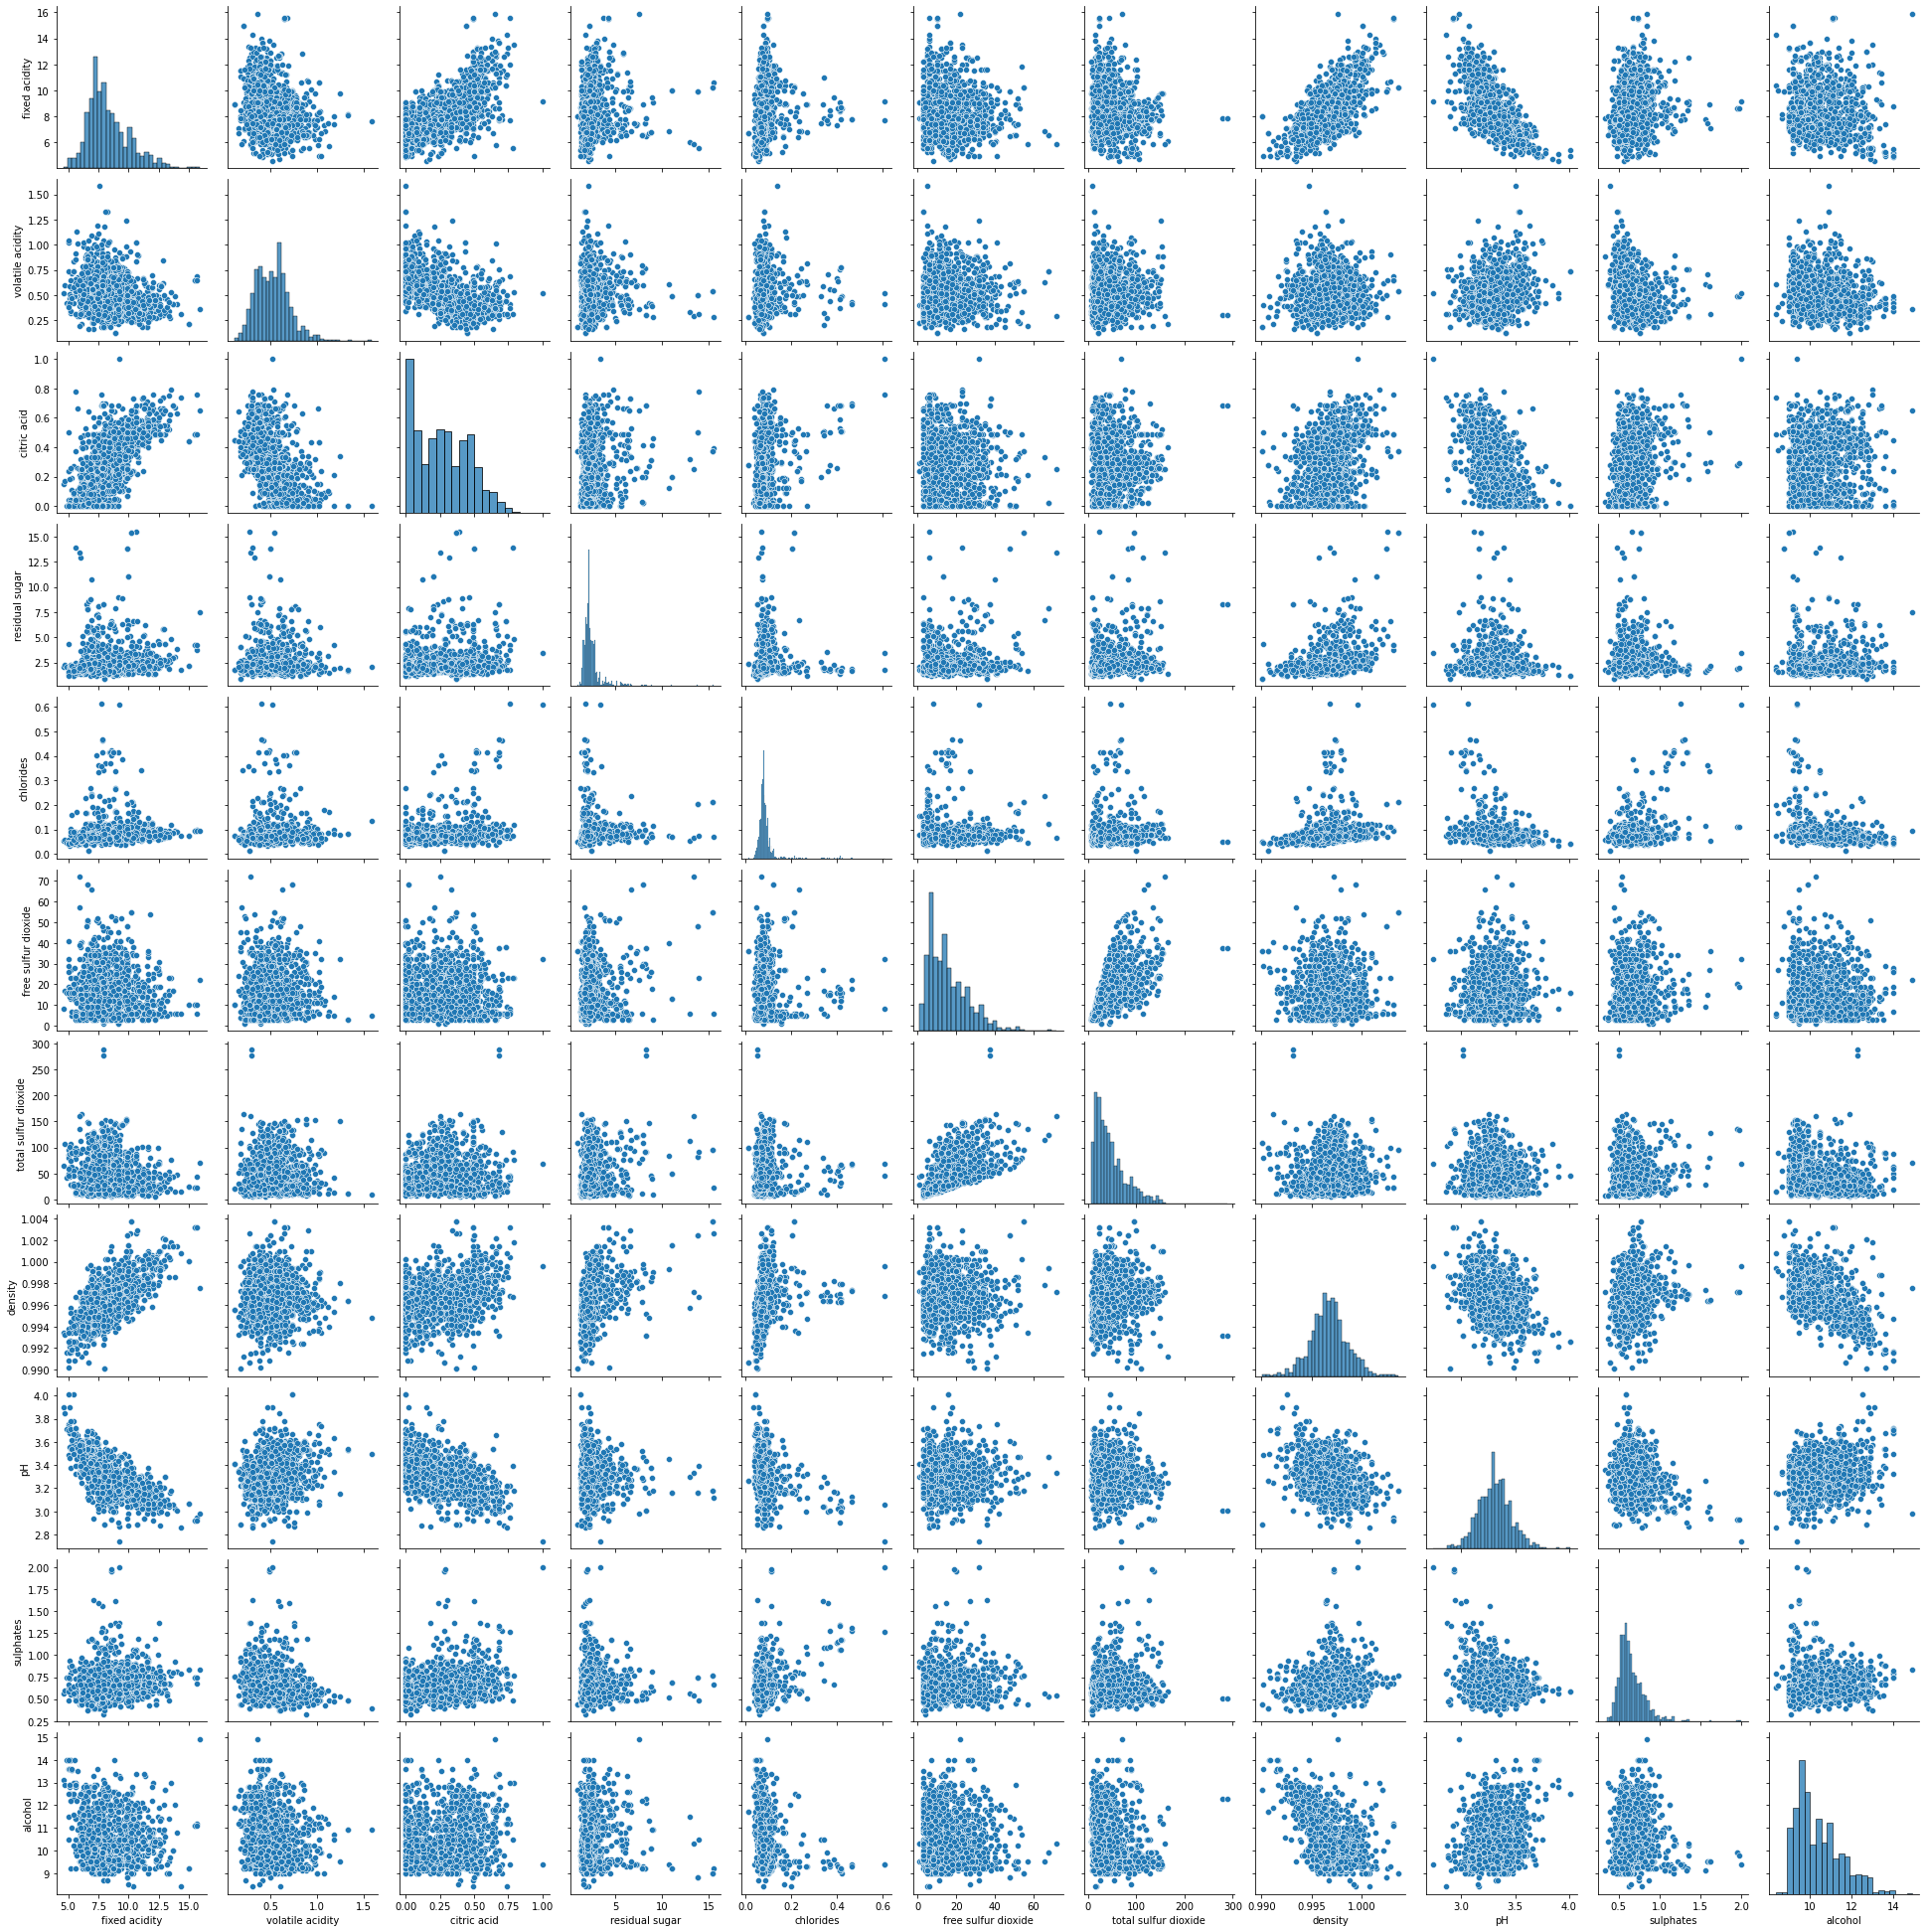

In [5]:
sns.pairplot(df)

In [6]:
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
df=wine_data.iloc[:,0:7]
fig = ff.create_scatterplotmatrix(df,height=800, width=800)
plotly.offline.iplot(fig, filename='Basic Scatterplot matrix')

### Heatmaps

In [7]:
url= "https://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
names1=names[0:8]
data = pd.read_table(url, names=names)
print(data.shape)
names2=names1[::-1]
print(names1)
print(names2)

(768, 9)
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
['age', 'pedi', 'mass', 'test', 'skin', 'pres', 'plas', 'preg']


In [8]:
yd=data['class']
Xd=data.iloc[:,0:8]

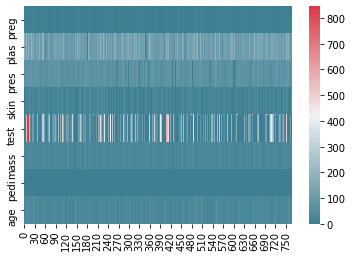

In [9]:
#Visualizando la matriz de datos
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Xd.T, cmap=colormap, fmt=".2f")
plt.show()

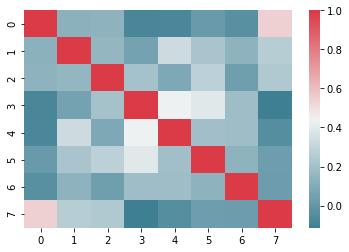

In [10]:
#Visualizando las  correlacions entre las features de Diabetes
corr1=np.corrcoef(Xd.T)
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1, cmap=colormap, fmt=".2f")
plt.show()

In [11]:
#Visualizing the correlation between columns of Landsat
data = pd.read_table("https://academic.uprm.edu/eacuna/landsat.txt", header=None,delim_whitespace=True)
X1=data.iloc[:,0:36]
scaler = StandardScaler()
scaler.fit(X1)
X1= scaler.transform(X1)

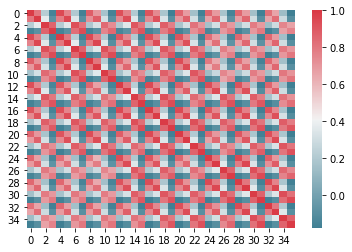

In [12]:
corr2=np.corrcoef(X1.T)
#Visualizando las correlaciones entre las columnas de Landsat
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr2, cmap=colormap, fmt=".2f")
plt.show()

In [13]:
#Heatmaps using Pyplot
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go
trace = go.Heatmap(
   x = names1,
   y = names1,
   z = corr1,
   type = 'heatmap',
   colorscale = 'Viridis'
)
data = [trace]
fig = go.Figure(data=data)
fig.show()